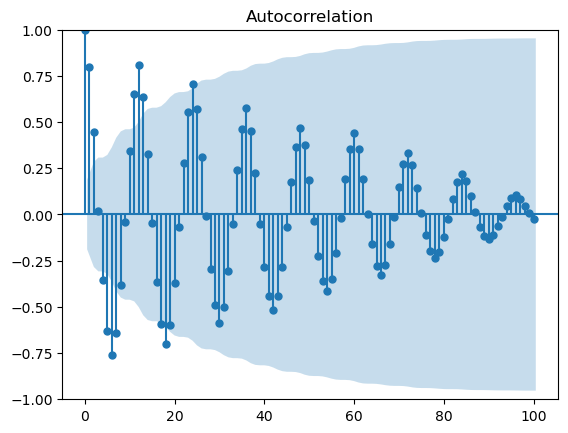

In [35]:
# ACF
acf_plot = plot_acf(df['sale'], lags=100)

# Based  on decaying ACF, we are likely dealing with an AR process

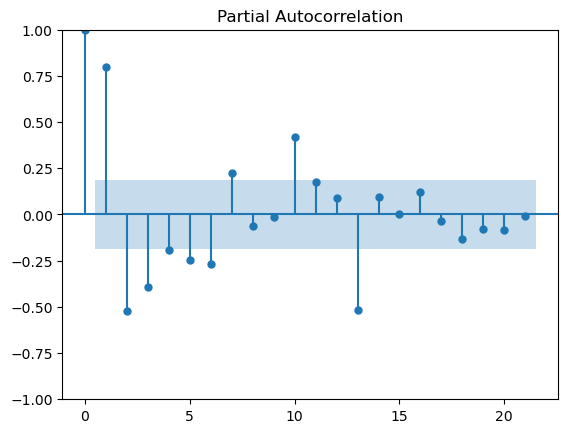

In [37]:
# PACF
pacf_plot = plot_pacf(df['sale'])



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [51]:
# Set plot style for publication quality
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (14, 10), 'font.size': 16})

plt.rc('font', family='serif')
#plt.rc('xtick', labelsize='large')
#plt.rc('ytick', labelsize='large')

# Load the AirPassengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
# Decompose the time series to identify trend and seasonal components
result = seasonal_decompose(data['Passengers'], model='additive')



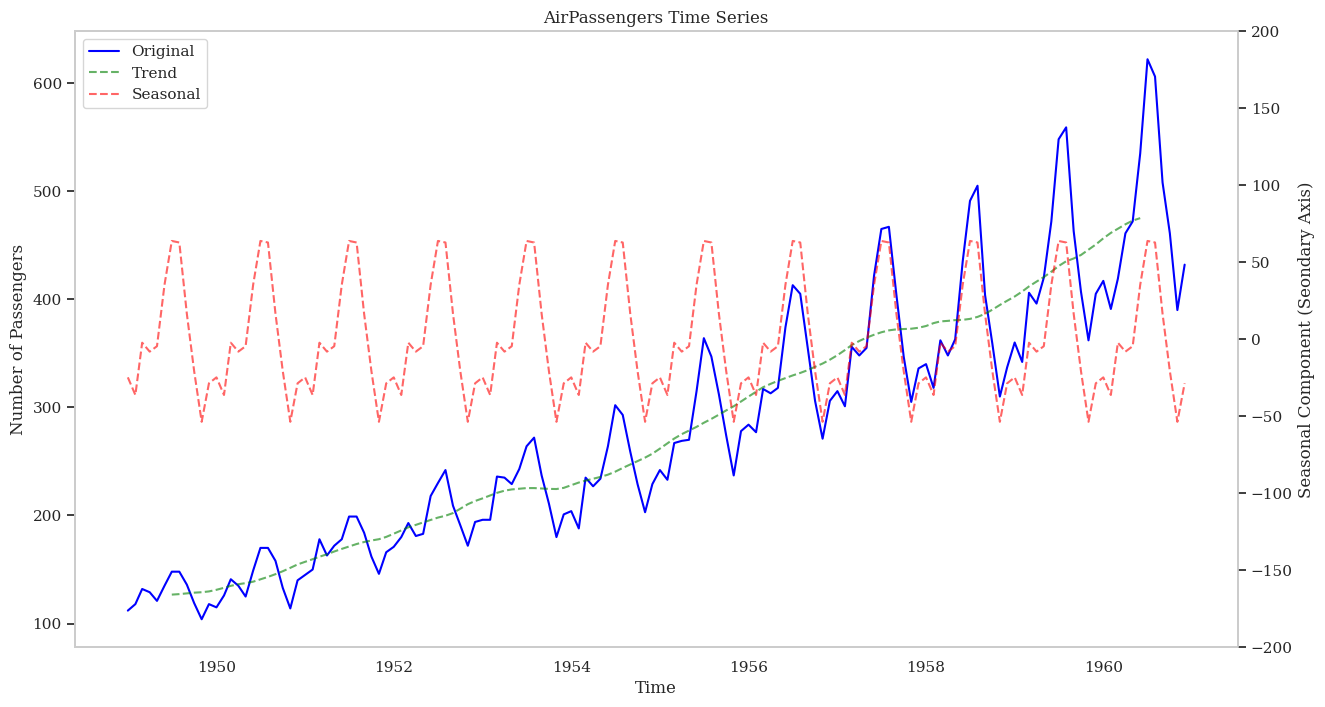

In [79]:
# Plot the original time series with annotations
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(data['Passengers'], label='Original', color='blue')
ax.set_title('AirPassengers Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Passengers')

# beautify plot with font type
ax.plot(result.trend, label='Trend', color='green', alpha=0.6, linestyle='--')

# add seasonal trend on secondary y-axis
ax2 = ax.twinx()
ax2.plot(result.seasonal, label='Seasonal', color='red', alpha=0.6, linestyle='--')
ax2.set_ylabel('Seasonal Component (Seondary Axis)')

# change seoconday axis range from -100 to 100
ax2.set_ylim(-200, 200)

# add legend for both primary and seconday y-axis together
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax2.grid(False)
ax.grid(False)


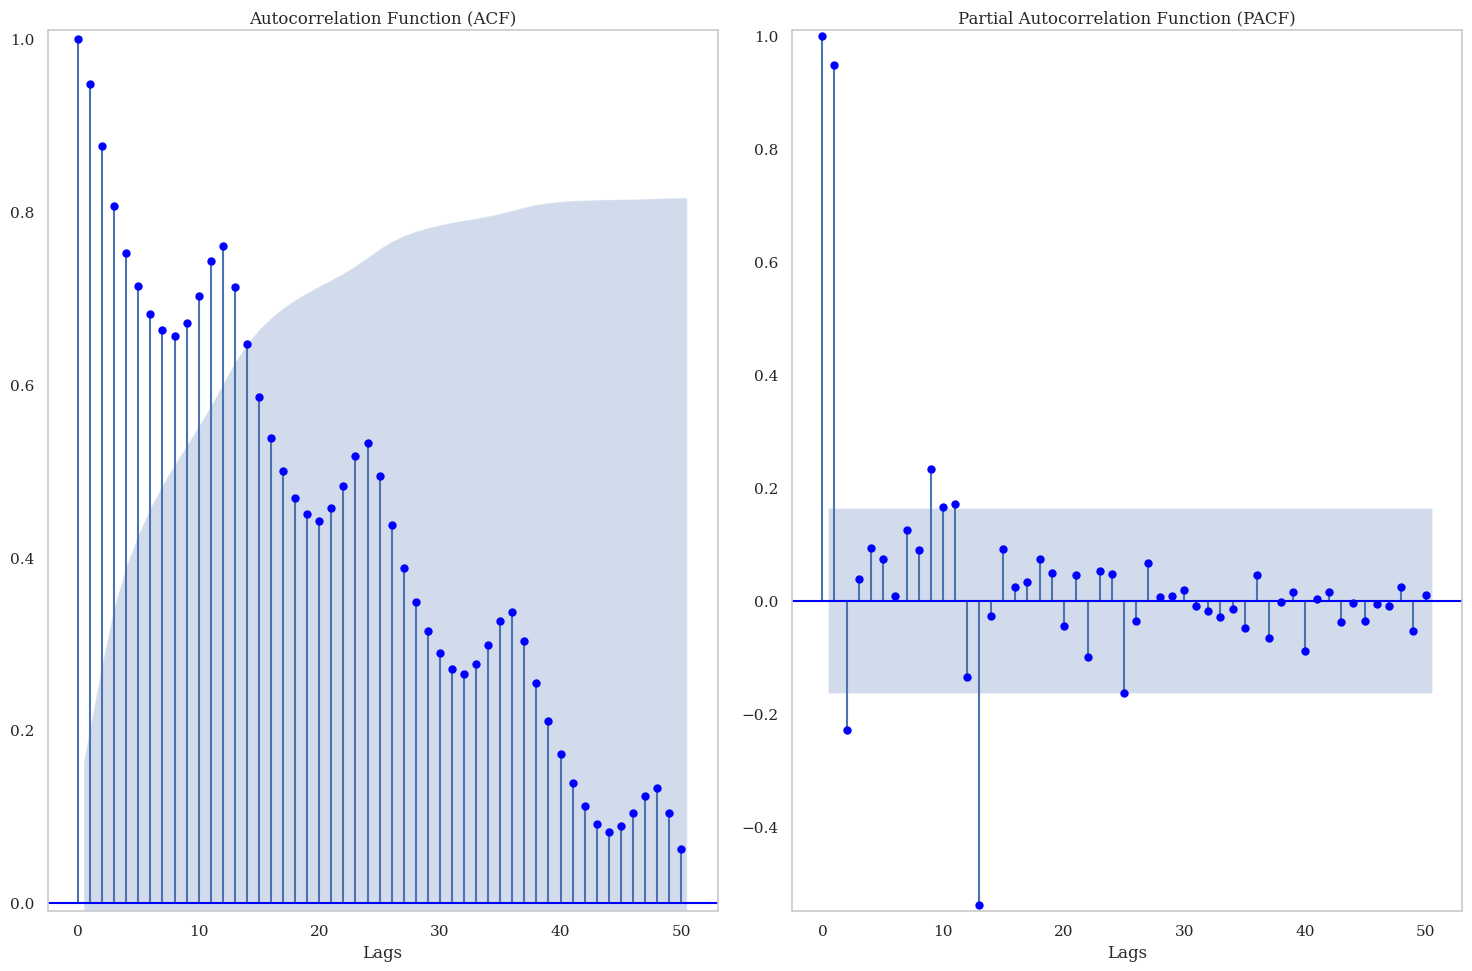

In [97]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

plot_acf(data['Passengers'], lags=50, ax=ax[0], color='blue')
ax[0].set_title('Autocorrelation Function (ACF)')
ax[0].ylim = (0, 1)
#change range of y-axis
ax[0].set_ylim(-0.01, 1.01)
ax[0].grid(False)
ax[0].set_xlabel('Lags')
plot_pacf(data['Passengers'], lags=50, ax=ax[1], color='blue')
ax[1].set_title('Partial Autocorrelation Function (PACF)')
ax[1].set_ylim(-0.55, 1.01)
ax[1].grid(False)
ax[1].set_xlabel('Lags')


plt.tight_layout()
plt.show()
#plt.legend('ACF and PACF')